# SCG taxonomy Analysis for the AR Water Age Project

Must run the python script first to generate the data csv. This code analyzes taxonomy using the single copy gene RPS2.

In [2]:
# Libraries
library(phyloseq); packageVersion("phyloseq")
library(ggplot2); packageVersion("ggplot2")
library(tidyr)
library(tidyverse)
library(dplyr)
library(tibble)
library(vegan); packageVersion("vegan")
library(scales)
library(repr)
library(reshape2)
library(genefilter)
library(microbiome)
library(VennDiagram)
library(svglite)
#library(gridExtra)
library(DESeq2); packageVersion("DESeq2")
library(stringr)
library(RColorBrewer)
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))
library('pheatmap')
library("viridis")

library(googlesheets4)
library(googledrive)

set.seed(100)

[1] ‘1.38.0’

[1] ‘3.3.6’

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ readr   2.1.2     ✔ stringr 1.4.1
✔ purrr   0.3.4     ✔ forcats 0.5.2

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: permute

Loading required package: lattice

This is vegan 2.6-4



[1] ‘2.6.4’


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths



Attaching package: ‘genefilter’


The following object is masked from ‘package:readr’:

    spec



microbiome R package (microbiome.github.com)
    


 Copyright (C) 2011-2021 Leo Lahti, 
    Sudarshan Shetty et al. <microbiome.github.io>



Attaching package: ‘microbiome’


The following object is masked from ‘package:scales’:

    alpha


The following object is masked from ‘package:vegan’:

    diversity


The following object is masked from ‘package:ggplot2’:

    alpha


The following object is masked from ‘package:base’:

    transform


Loading required package: grid

Loading required package: futile.logger

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGene

[1] ‘1.34.0’

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal



Attaching package: ‘googledrive’


The following objects are masked from ‘package:googlesheets4’:

    request_generate, request_make




In [3]:
# Papertheme 
papertheme <- function(ggplotobject){
  library(ggplot2)  
  ggplotnewobject <- ggplotobject + 
    theme(text = element_text(size = 14),
          axis.ticks.x = element_line(colour = "#696969",size=0.5), 
          axis.ticks.y =element_line(colour = "#696969",size=0.5),
          axis.ticks.length=unit(0.2,"cm"),
          panel.background = element_rect(fill = "white"),
          panel.grid.major=element_blank(),
          panel.grid.minor=element_blank(),
          axis.line.x  = element_blank(),
          axis.line.y  = element_blank(),
          plot.title = element_text(size = 16, family="sans", face="plain", colour = "#696969"),
          axis.text.x = element_text(size = 14,colour="#696969",family="sans"),
          axis.text.y = element_text(size = 14,colour="#696969",family="sans"),
          axis.title.x = element_text(size =16,color="#696969",family="sans"),
          axis.title.y = element_text(size=16,color="#696969",family="sans"),
          strip.text.x = element_text(size = 14),
          legend.key = element_blank(),
          legend.text = element_text(size=12,family="sans", color="#696969"),
          legend.title=element_text(size=13,family="sans", color="#696969", face = "bold"),
          strip.background = element_blank(),
          axis.line=element_blank(),
          panel.border = element_rect(colour = "#696969",size=0.5, fill = "transparent"),
          plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"))+
    guides(shape = guide_legend(override.aes = list(size = 1.5)),
           color = guide_legend(override.aes = list(size = 1.5))) +
    theme(legend.title = element_text(size = 14), 
          legend.text  = element_text(size = 14),
          legend.key.size = unit(1, "lines"))
  return(ggplotnewobject)}

# High resolution for export
dpi <- 300

In [4]:
# Colour palette
values <- brewer.pal(11, "RdYlBu")

# Randomize colours for visibility
colors2 <- sample(colorRampPalette(brewer.pal(11, "RdYlBu"))(27))
values2 <- sample(colorRampPalette(brewer.pal(11, "RdYlBu"))(10))

# Colour selection for when colouring according to location
# In order = c("Tertiary_WW", "BAC","MF", "RO_biofilm_feed","RO_biofilm_permeate" ,"RO")
locations_colors <- c(values[1],values[11],values[3],values[10],values[4],values[5],values[2],values[6])
palette(c(values[1],values[11],values[3],values[10],values[4],values[5],values[2],values[6]))

# Colour selection for when colouring according to location
# In order = c("Tertiary_WW", "BAC","MF", "RO")
locations_colors_bulk <- c(values[1],values[11],values[3],values[5],values[2],values[6])

# General colour set PhD
colors3 <- c("#BF0000","#fdc5bc","#feb803","#fffac9","#3f7ead","#104c7a","#afdbee","#f7d7b7","#e06666",
             "#b01414","#c06401","#ffe399","#600808","#faf0e5","#e6c2c2","#e4f2ff","#9fc5e8","#0b5394",
             "#999999","#eeeeee","#bcbcbc","#5b5b5b","#0c4973","#a4d1fb","#ffc79d","#e87803","#4d3434","#cb8989",
             #nice set until here - others are extra
             "#dfd2c9","#f46d43","#ffcdaa","#fecfcf","#EA8484","#dfd2c9","#525564","#aa4f4b",
             "#f46d43","#313695","#fee090","#4575b4","#96c0ce", "#74828f","#fdae61","#c25b56","#ffc6c6",
             "#525564","#fecfcf","#dfd2c9","#c25b56","#313695","#D73027","#313695","#FEE090","#F46D43",
             "#E4DFB6","#858585","#B78A8A","#d7eff5", "#CE6924","#2B2F7D","#FEF6EB","#a50026")

na.color <- "#fef6eb"

## Read files and make table

In [5]:
# Path
path <- c('/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/')

#read in table created in python
tax_df <- read_delim( "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/scg/taxcoverage_df.csv", delim = ",", col_names = TRUE) 
genus_df <- read_delim( "/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/scg/genus_df.csv", delim = ",", col_names = TRUE) 

tax_df = subset(tax_df, select = -c(ARSTAG_CONTROL_MANIFB_41) )

head(genus_df)

Rows: 529 Columns: 47
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): scg_name, t_domain, t_phylum, t_class, t_order, t_family, t_genus,...
dbl (38): ARSTAG_AR_2_40, ARSTAG_AR_2_41, ARSTAG_BF_2_40, ARSTAG_BF_2_41, AR...
lgl  (1): ARSTAG_CONTROL_MANIFB_41

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 2926 Columns: 5
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (2): sample_id, t_genus
dbl (3): percent_identity, coverage, log_cov

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column typ

sample_id,t_genus,percent_identity,coverage,log_cov
<chr>,<chr>,<dbl>,<dbl>,<dbl>
ARSTAG_AR_1_23,66-26,500.0,0.05461084,-1.262721
ARSTAG_AR_1_23,Afipia,698.2,0.00000000,-Inf
ARSTAG_AR_1_23,BOG-234,100.0,0.00000000,-Inf
ARSTAG_AR_1_23,Bacillus,200.0,0.00000000,-Inf
ARSTAG_AR_1_23,Bog-105,100.0,0.00000000,-Inf
ARSTAG_AR_1_23,Bosea,1875.0,0.00000000,-Inf


In [6]:
# Change level order

new_levels <- c('ARSTAG_TAPRES_TAPRES_23', 'ARSTAG_AR_1_23', 'ARSTAG_AR_2_23', 'ARSTAG_AR_3_23', 'ARSTAG_AR_4_23', 'ARSTAG_AR_5_23', 
             'ARSTAG_TAPRES_TAPRES_27', 'ARSTAG_AR_1_27','ARSTAG_AR_2_27','ARSTAG_AR_3_27','ARSTAG_AR_4_27','ARSTAG_AR_5_27',
             'ARSTAG_TAPRES_TAPRES_40', 'ARSTAG_AR_1_40', 'ARSTAG_AR_2_40', 'ARSTAG_AR_3_40', 'ARSTAG_AR_4_40', 'ARSTAG_AR_5_40',
            'ARSTAG_BF_1_40', 'ARSTAG_BF_2_40', 'ARSTAG_BF_3_40', 'ARSTAG_BF_4_40', 'ARSTAG_BF_5_40',
            'ARSTAG_TAPRES_TAPRES_41', 'ARSTAG_AR_1_41', 'ARSTAG_AR_2_41', 'ARSTAG_AR_3_41', 'ARSTAG_AR_4_41', 'ARSTAG_AR_5_41',
            'ARSTAG_BF_1_41','ARSTAG_BF_2_41', 'ARSTAG_BF_3_41', 'ARSTAG_BF_4_41', 'ARSTAG_BF_5_41',
             'ARSTAG_CONTROL_BFSLIDECONTROL_41', 'ARSTAG_CONTROL_MANIFB_41', 'ARSTAG_CONTROL_MOCK1E10_111821','ARSTAG_CONTROL_MOCK1E8_111821')

genus_df$sample_id <- factor(genus_df$sample_id, levels=new_levels)



In [7]:
#metadata from google sheets
drive_auth(path="/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/AR-Water-Quality-Data/access-to-jupyter-21919fd4c701.json", cache=TRUE)
gs4_auth(path="/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/DPR_AR_Research/AR-Water-Quality-Data/access-to-jupyter-21919fd4c701.json")

#import dfs 
master_sampling <- drive_get("AR MasterDataSheet") 
id2code <- master_sampling %>% read_sheet(sheet= "ggkbase_names")
arbf <- master_sampling %>% read_sheet(sheet= "ARBF_data") %>% subset(replicate == 'A')

✔ The input `path` resolved to exactly 1 file.

✔ Reading from AR MasterDataSheet.

✔ Range ''ggkbase_names''.

✔ Reading from AR MasterDataSheet.

✔ Range ''ARBF_data''.



In [8]:
#sample_ids 
ids_old <- c('ARSTAG_TAPRES_TAPRES_23', 'ARSTAG_AR_1_23', 'ARSTAG_AR_2_23', 'ARSTAG_AR_3_23', 'ARSTAG_AR_4_23', 'ARSTAG_AR_5_23', 
             'ARSTAG_TAPRES_TAPRES_27', 'ARSTAG_AR_1_27','ARSTAG_AR_2_27','ARSTAG_AR_3_27','ARSTAG_AR_4_27','ARSTAG_AR_5_27',
             'ARSTAG_TAPRES_TAPRES_40', 'ARSTAG_AR_1_40', 'ARSTAG_AR_2_40', 'ARSTAG_AR_3_40', 'ARSTAG_AR_4_40', 'ARSTAG_AR_5_40',
            'ARSTAG_BF_1_40', 'ARSTAG_BF_2_40', 'ARSTAG_BF_3_40', 'ARSTAG_BF_4_40', 'ARSTAG_BF_5_40',
            'ARSTAG_TAPRES_TAPRES_41', 'ARSTAG_AR_1_41', 'ARSTAG_AR_2_41', 'ARSTAG_AR_3_41', 'ARSTAG_AR_4_41', 'ARSTAG_AR_5_41',
            'ARSTAG_BF_1_41','ARSTAG_BF_2_41', 'ARSTAG_BF_3_41', 'ARSTAG_BF_4_41', 'ARSTAG_BF_5_41',
             'ARSTAG_CONTROL_BFSLIDECONTROL_41', 'ARSTAG_CONTROL_MANIFB_41', 'ARSTAG_CONTROL_MOCK1E10_111821','ARSTAG_CONTROL_MOCK1E8_111821')

ids <- c('tapres_134','AR1_134','AR2_134','AR3_134','AR4_134','AR5_134' ,
         'tapres_162', 'AR1_162','AR2_162','AR3_162','AR4_162','AR5_162',
         'tapres_372','AR1_372','AR2_372','AR3_372','AR4_372','AR5_372','BF1_372','BF2_372','BF3_372','BF4_372','BF5_372',
         'tapres_387','AR1_387','AR2_387','AR3_387','AR4_387','AR5_387','BF1_387','BF2_387','BF3_387','BF4_387','BF5_387',
         'control_mock1e10','control_mock1e8','manifcontrol_387','slidecontrol_387')

In [9]:
#change sample_id to match updated names (swap sample event for sampling day)

genus_df <- genus_df %>% dplyr::rename("ggkbase_id"="sample_id") 
genus_df <- merge(genus_df, id2code, by.x='ggkbase_id', by.y='ggkbase_project_name')
genus_df <- subset(genus_df, select= -c(sample_id_old, ggkbase_id))

head(genus_df)
         

,t_genus,percent_identity,coverage,log_cov,sample_id
,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,66-26,500.0,0.05461084,-1.262721,AR1_134
2,Afipia,698.2,0.00000000,-Inf,AR1_134
3,BOG-234,100.0,0.00000000,-Inf,AR1_134
4,Bacillus,200.0,0.00000000,-Inf,AR1_134
5,Bog-105,100.0,0.00000000,-Inf,AR1_134
6,Bosea,1875.0,0.00000000,-Inf,AR1_134


In [17]:
# Alpha Diversity
alpha_df <- pivot_wider(genus_df, id_cols= t_genus,  names_from = sample_id, values_from = coverage)

coverage_df3 <- (subset(alpha_df, select= -c(t_genus)))
rownames(coverage_df3) <- alpha_df$sample_id
alpha_data <- diversity(coverage_df3, index = "shannon")

alpha_data

Warning message:
“Unknown or uninitialised column: `sample_id`.”


,shannon
,<dbl>
AR1_134,2.059772
AR1_162,1.963985
AR1_372,1.513709
AR1_387,2.410159
AR2_134,2.194983
AR2_162,2.305616
AR2_372,2.333609
AR2_387,2.304637
AR3_134,2.162503


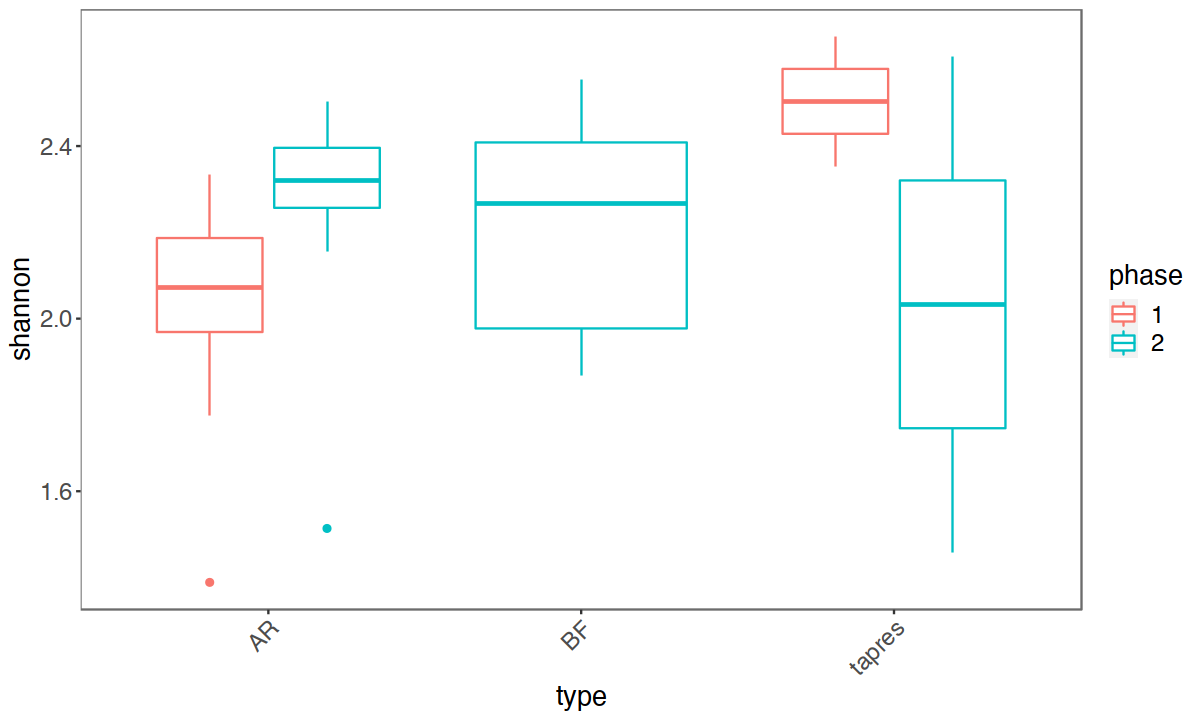

In [18]:
alpha_data["type"] <- "AR"
alpha_data$type[(str_detect(rownames(alpha_data), "BF"))] <- "BF"
alpha_data$type[(str_detect(rownames(alpha_data), "tapres"))] <- "tapres"
alpha_data$phase[(str_detect(rownames(alpha_data), "134"))|(str_detect(rownames(alpha_data), "162"))] <- "1"
alpha_data$phase[(str_detect(rownames(alpha_data), "372"))|(str_detect(rownames(alpha_data), "387"))] <- "2"
alpha_data <- alpha_data[rownames(alpha_data) != 'slidecontrol_387' & rownames(alpha_data) != 'manifcontrol_387' & 
                         rownames(alpha_data) != 'control_mock1e10'& rownames(alpha_data) != 'control_mock1e8', ]

 # n_fun <- function(x){return(data.frame(y = max(x), label = paste0("n=",length(x))))}
# alpha_data
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(alpha_data)+
geom_boxplot(aes(x= type, colour= phase, y= shannon))+
# stat_summary(fun.data = n_fun, geom = "text", vjust=-1)+
theme(panel.background=element_blank(), panel.border = element_rect(color = "#6c6c6c", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=14),
        axis.text.y = element_text(size = 14),
        legend.text = element_text(size = 14),
        axis.title.x = element_text(size =16),
        axis.title.y = element_text(size=16),
        strip.text.x=element_text(size = 14),
        legend.title = element_text(size = 16))




## Heatmap

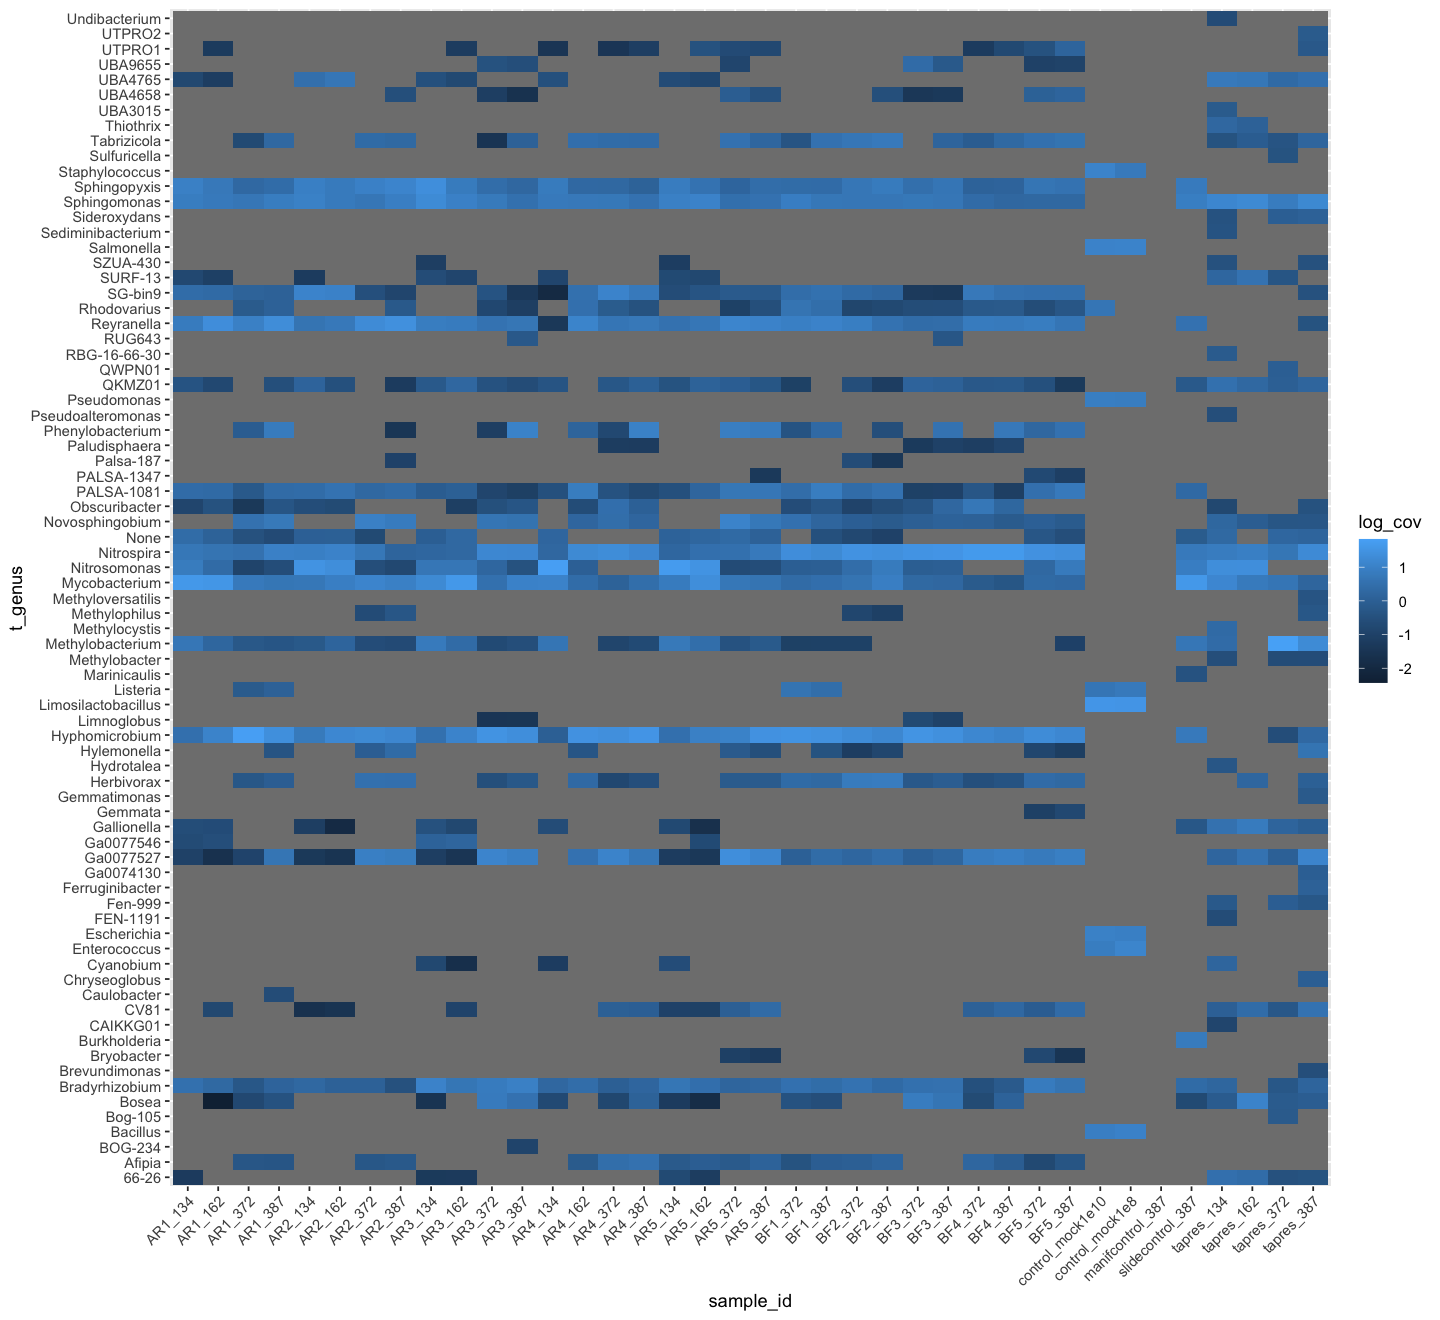

In [31]:
options(repr.plot.width = 12, repr.plot.height = 11)
   
ggplot(genus_df, aes(x=sample_id, y=t_genus))+
geom_tile(aes(fill=log_cov))+
theme(axis.text.x=element_text(angle=45, hjust=1, vjust = 1))

# ggsave('~/data/awtp2_metagenomics/mash_dist_heatmap.pdf', device="pdf", width=7, height=5.5)

In [32]:
#long to wide format for correlation
rps2_norm <- pivot_wider(genus_df, id_cols= sample_id,  names_from = t_genus, values_from = coverage)
rownames <- rps2_norm$sample_id
rps2_norm <- subset(rps2_norm, select= -c(sample_id))
row.names(rps2_norm) <- rownames
rps2_norm <- as.matrix(rps2_norm) #convert to matrix
head(rps2_norm)

#also without controls
rps2_norm_nocontrols <- pivot_wider(genus_df, id_cols= sample_id,  names_from = t_genus, values_from = coverage)
rps2_norm_nocontrols <- rps2_norm_nocontrols %>% filter(sample_id != "slidecontrol_387") %>% filter(sample_id != "manifcontrol_387") %>% filter(sample_id != "control_mock1e8") %>% filter(sample_id != "control_mock1e10") #%>% filter(sample_id != "tapres_134")%>% filter(sample_id != "tapres_162")%>% filter(sample_id != "tapres_372") %>% filter(sample_id != "tapres_387")
#drop columns that now sum to zero 
rps2_norm_nocontrols<- rps2_norm_nocontrols %>% select_if(negate(function(col) is.numeric(col) && sum(col) == 0 ))
rownames_nocontrols <- rps2_norm_nocontrols$sample_id
rps2_norm_nocontrols <- subset(rps2_norm_nocontrols, select= -c(sample_id))
row.names(rps2_norm_nocontrols) <- rownames_nocontrols
rps2_norm_nocontrols <- as.matrix(rps2_norm_nocontrols) #convert to matrix
rownames_nocontrols
rps2_norm_nocontrols
                                                                 
#also without controls and tapres
rps2_norm_notap <- pivot_wider(genus_df, id_cols= sample_id,  names_from = t_genus, values_from = coverage)
rps2_norm_notap <- rps2_norm_notap %>% filter(sample_id != "slidecontrol_387") %>% filter(sample_id != "manifcontrol_387") %>% filter(sample_id != "control_mock1e8") %>% filter(sample_id != "control_mock1e10") %>% filter(sample_id != "tapres_134")%>% filter(sample_id != "tapres_162")%>% filter(sample_id != "tapres_372") %>% filter(sample_id != "tapres_387")
#drop columns that now sum to zero 
rps2_norm_notap<- rps2_norm_notap %>% select_if(negate(function(col) is.numeric(col) && sum(col) == 0 ))
rownames_notap <- rps2_norm_notap$sample_id
rps2_norm_notap <- subset(rps2_norm_notap, select= -c(sample_id))
row.names(rps2_norm_notap) <- rownames_notap
rps2_norm_notap <- as.matrix(rps2_norm_notap) #convert to matrix


Warning message:
“Setting row names on a tibble is deprecated.”


,66-26,Afipia,BOG-234,Bacillus,Bog-105,Bosea,Bradyrhizobium,Brevundimonas,Bryobacter,Burkholderia,⋯,Sulfuricella,Tabrizicola,Thiothrix,UBA3015,UBA4658,UBA4765,UBA9655,UTPRO1,UTPRO2,Undibacterium
AR1_134,0.05461084,0.0000000,0,0,0,0.000000000,3.4885289,0,0,0,⋯,0,0.0000000,0,0,0,0.15918253,0,0.00000000,0,0
AR1_162,0.00000000,0.0000000,0,0,0,0.003716431,2.0135218,0,0,0,⋯,0,0.0000000,0,0,0,0.06869102,0,0.05505177,0,0
AR1_372,0.00000000,0.5120685,0,0,0,0.169286237,0.5331088,0,0,0,⋯,0,0.1869711,0,0,0,0.00000000,0,0.00000000,0,0
AR1_387,0.00000000,0.4736276,0,0,0,0.382838292,1.3927552,0,0,0,⋯,0,1.9172457,0,0,0,0.00000000,0,0.00000000,0,0
AR2_134,0.00000000,0.0000000,0,0,0,0.000000000,1.8742379,0,0,0,⋯,0,0.0000000,0,0,0,3.13002831,0,0.00000000,0,0
AR2_162,0.00000000,0.0000000,0,0,0,0.000000000,1.1698385,0,0,0,⋯,0,0.0000000,0,0,0,4.91130070,0,0.00000000,0,0


Warning message:
“Setting row names on a tibble is deprecated.”


[1] "AR1_134"    "AR1_162"    "AR1_372"    "AR1_387"    "AR2_134"   
 [6] "AR2_162"    "AR2_372"    "AR2_387"    "AR3_134"    "AR3_162"   
[11] "AR3_372"    "AR3_387"    "AR4_134"    "AR4_162"    "AR4_372"   
[16] "AR4_387"    "AR5_134"    "AR5_162"    "AR5_372"    "AR5_387"   
[21] "BF1_372"    "BF1_387"    "BF2_372"    "BF2_387"    "BF3_372"   
[26] "BF3_387"    "BF4_372"    "BF4_387"    "BF5_372"    "BF5_387"   
[31] "tapres_134" "tapres_162" "tapres_372" "tapres_387"

,66-26,Afipia,BOG-234,Bog-105,Bosea,Bradyrhizobium,Brevundimonas,Bryobacter,CAIKKG01,CV81,⋯,Sulfuricella,Tabrizicola,Thiothrix,UBA3015,UBA4658,UBA4765,UBA9655,UTPRO1,UTPRO2,Undibacterium
AR1_134,0.05461084,0.0000000,0.0000000,0.0000000,0.000000000,3.4885289,0.0000000,0.00000000,0.0000000,0.00000000,⋯,0.0000000,0.00000000,0.000000,0.0000000,0.00000000,0.15918253,0.00000000,0.00000000,0.0000000,0.0000000
AR1_162,0.00000000,0.0000000,0.0000000,0.0000000,0.003716431,2.0135218,0.0000000,0.00000000,0.0000000,0.16098199,⋯,0.0000000,0.00000000,0.000000,0.0000000,0.00000000,0.06869102,0.00000000,0.05505177,0.0000000,0.0000000
AR1_372,0.00000000,0.5120685,0.0000000,0.0000000,0.169286237,0.5331088,0.0000000,0.00000000,0.0000000,0.00000000,⋯,0.0000000,0.18697115,0.000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000
AR1_387,0.00000000,0.4736276,0.0000000,0.0000000,0.382838292,1.3927552,0.0000000,0.00000000,0.0000000,0.00000000,⋯,0.0000000,1.91724569,0.000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000
AR2_134,0.00000000,0.0000000,0.0000000,0.0000000,0.000000000,1.8742379,0.0000000,0.00000000,0.0000000,0.02289048,⋯,0.0000000,0.00000000,0.000000,0.0000000,0.00000000,3.13002831,0.00000000,0.00000000,0.0000000,0.0000000
AR2_162,0.00000000,0.0000000,0.0000000,0.0000000,0.000000000,1.1698385,0.0000000,0.00000000,0.0000000,0.02862476,⋯,0.0000000,0.00000000,0.000000,0.0000000,0.00000000,4.91130070,0.00000000,0.00000000,0.0000000,0.0000000
AR2_372,0.00000000,0.5239759,0.0000000,0.0000000,0.000000000,1.2094840,0.0000000,0.00000000,0.0000000,0.00000000,⋯,0.0000000,2.33519721,0.000000,0.0000000,0.00000000,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000
AR2_387,0.00000000,0.6095021,0.0000000,0.0000000,0.000000000,0.3417597,0.0000000,0.00000000,0.0000000,0.00000000,⋯,0.0000000,2.03057637,0.000000,0.0000000,0.28832068,0.00000000,0.00000000,0.00000000,0.0000000,0.0000000
AR3_134,0.04793111,0.0000000,0.0000000,0.0000000,0.028081634,11.0848051,0.0000000,0.00000000,0.0000000,0.00000000,⋯,0.0000000,0.00000000,0.000000,0.0000000,0.00000000,0.33175096,0.00000000,0.00000000,0.0000000,0.0000000
AR3_162,0.05279919,0.0000000,0.0000000,0.0000000,0.000000000,4.6571770,0.0000000,0.00000000,0.0000000,0.11104545,⋯,0.0000000,0.00000000,0.000000,0.0000000,0.00000000,0.17912708,0.00000000,0.06057643,0.0000000,0.0000000


Warning message:
“Setting row names on a tibble is deprecated.”


In [33]:
#clustering samples and scaffolds for clustered heatmap (make sure NAs are zeros)

#cluster samples by bray curtis (first turn NA to zero)
rps2_norm_for_clust <- ifelse(is.na(rps2_norm), 0, rps2_norm)

#cluster scaffolds by occurrence, using Spearman rank correlation converted to distance matrix
corrdist_dissimilarity <- as.dist(1 - cor(rps2_norm_for_clust, method="spearman")) 
scaff_clust <- hclust(corrdist_dissimilarity)

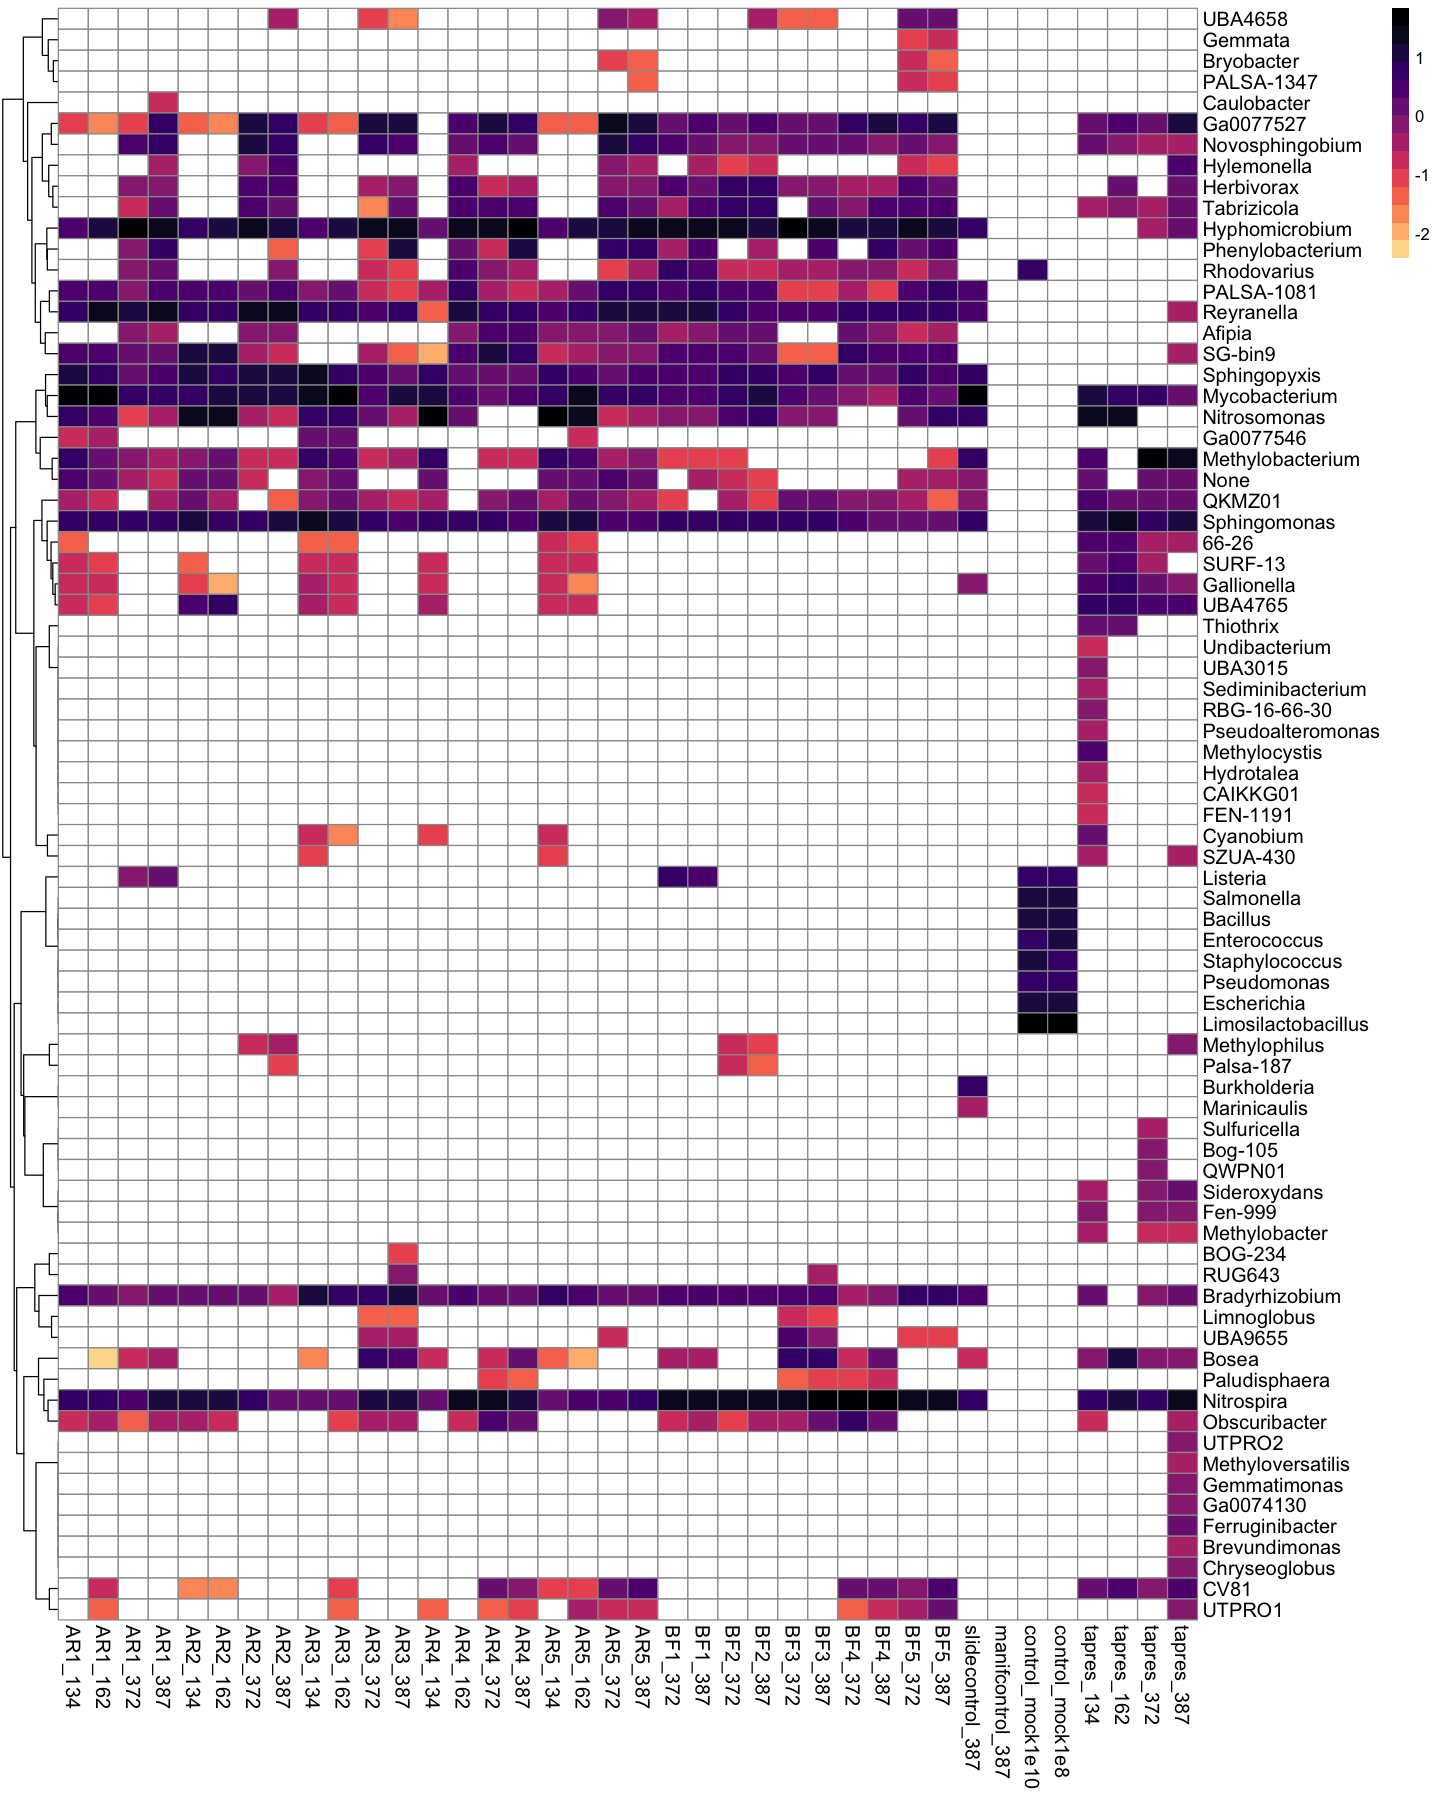

In [34]:
#Log-scale and plot heatmaps
rps2_norm <- ifelse(rps2_norm==0, NA, rps2_norm) #make sure zeros are NAs for non-detects
rps2.logabundance <- log10(rps2_norm)

options(repr.plot.width = 12, repr.plot.height = 15)

pheatmap(t(rps2.logabundance), 
         color=rev(magma(15)[1:14]), 
         #cluster_cols=sample_clust, 
         cluster_cols=FALSE,
         cluster_rows=scaff_clust,
         na_col="white",
         labels_row=as.character(genus_df$t_genus),
         #labels_col=as.character(metagenome_info$Sample_code), #to change col names
         fontsize_row=12, fontsize_col=12,
         treeheight_row=30)

#save as pdf (uncomment these lines)
        # filename="/SCIENCE/Nelson_lab/data_files_nelson/el_paso_metagenomics/rps3_analyses/rps3_heatmap.pdf", width=4.5, height=7)

### No controls

In [35]:
#clustering samples and scaffolds for clustered heatmap (make sure NAs are zeros)

#cluster samples by bray curtis (first turn NA to zero)
rps2_norm_for_clust <- ifelse(is.na(rps2_norm_nocontrols), 0, rps2_norm_nocontrols)

#cluster scaffolds by occurrence, using Spearman rank correlation converted to distance matrix
corrdist_dissimilarity <- as.dist(1 - cor(rps2_norm_for_clust, method="spearman")) 
scaff_clust <- hclust(corrdist_dissimilarity)

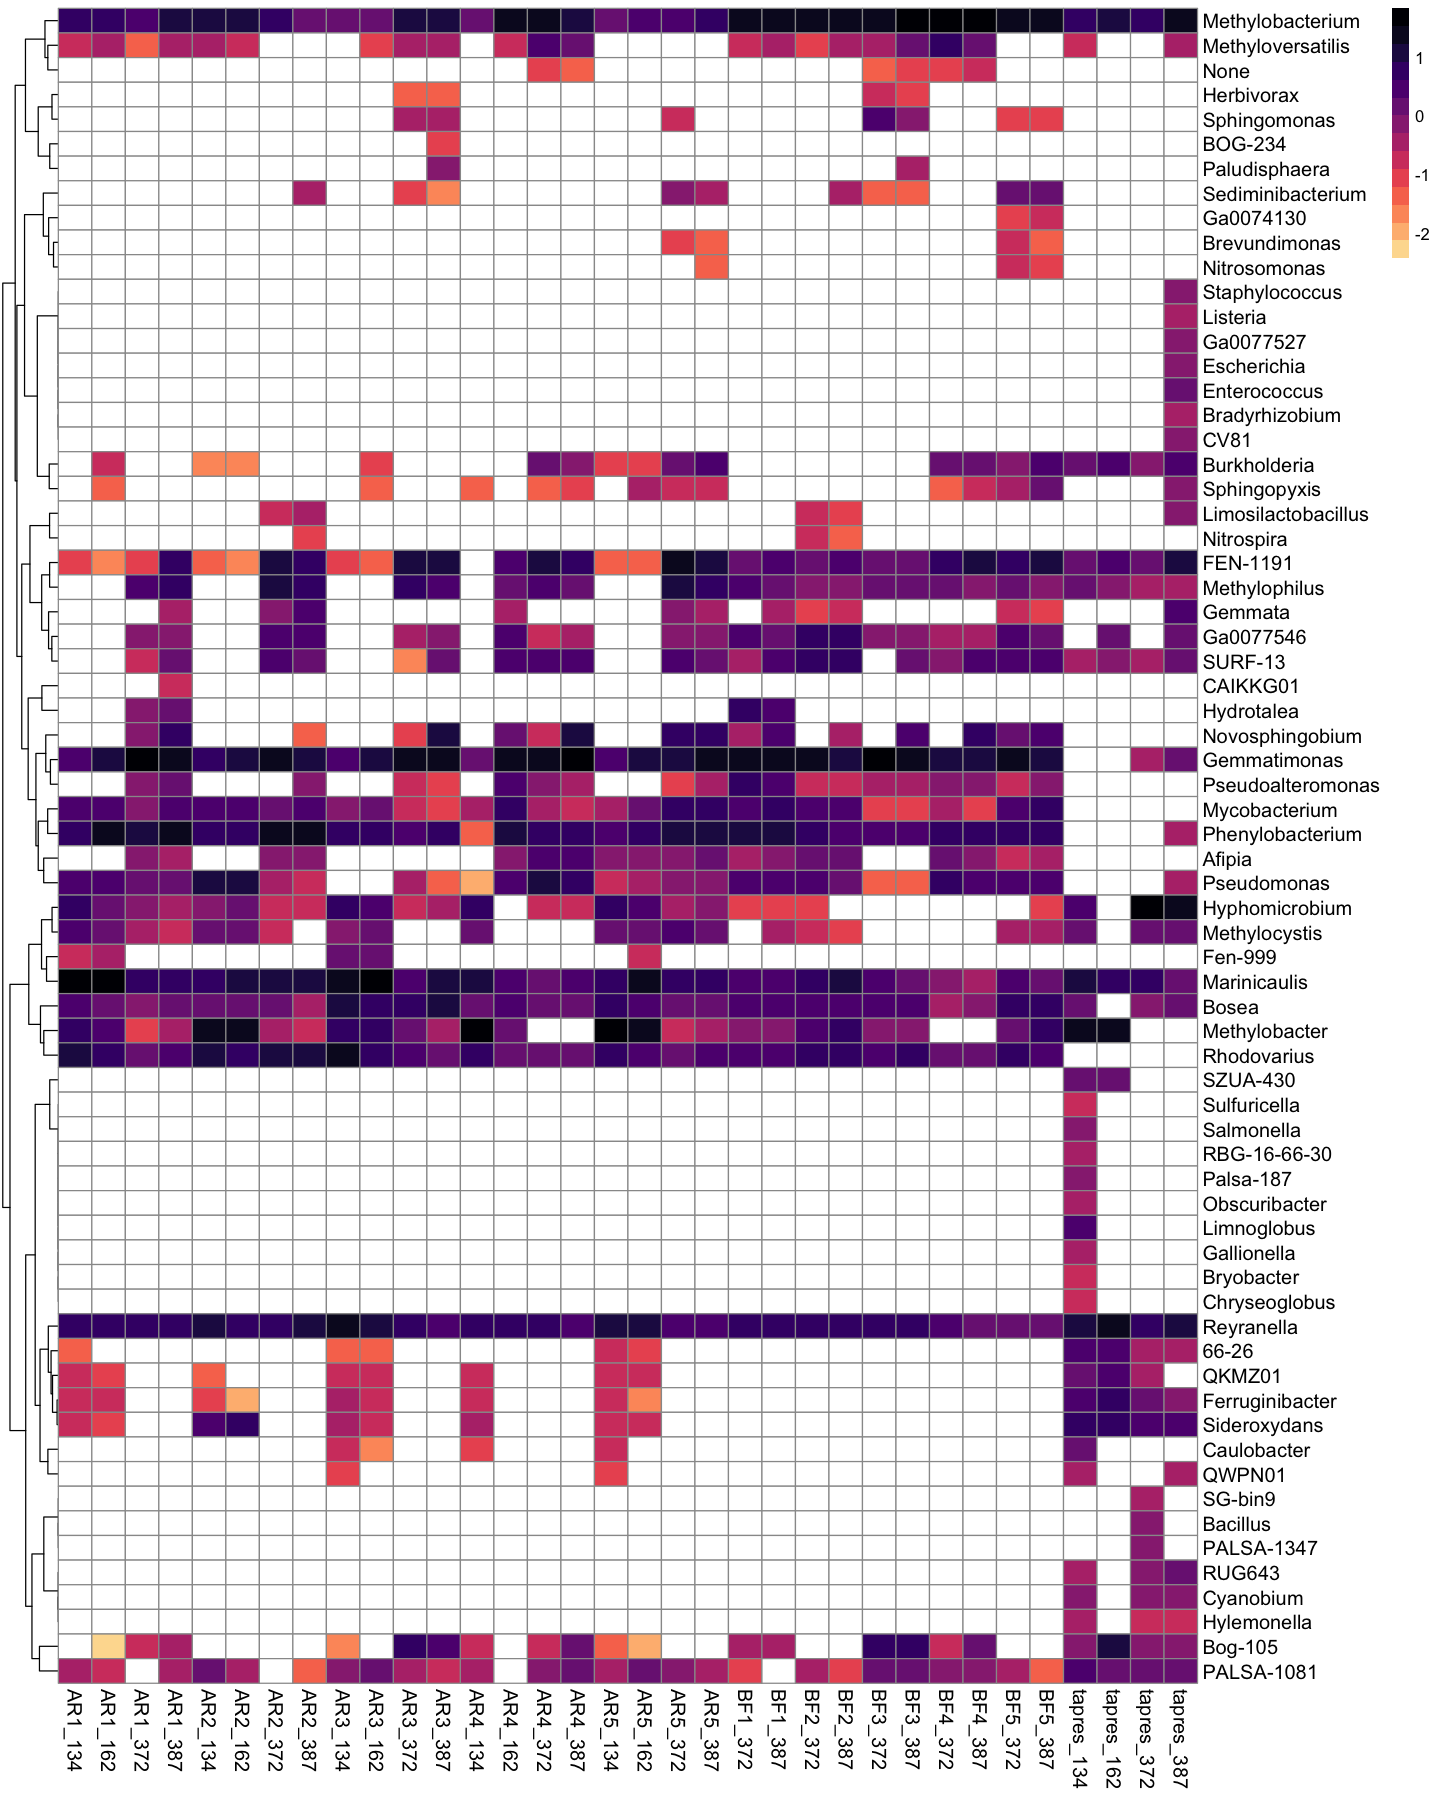

In [36]:
#Log-scale and plot heatmaps
rps2_norm_nocontrols <- ifelse(rps2_norm_nocontrols==0, NA, rps2_norm_nocontrols) #make sure zeros are NAs for non-detects
rps2.logabundance <- log10(rps2_norm_nocontrols)

options(repr.plot.width = 12, repr.plot.height = 15)

pheatmap(t(rps2.logabundance), 
         color=rev(magma(15)[1:14]), 
         #cluster_cols=sample_clust, 
         cluster_cols=FALSE,
         cluster_rows=scaff_clust,
         na_col="white",
         labels_row=as.character(genus_df$t_genus),
         #labels_col=as.character(metagenome_info$Sample_code), #to change col names
         fontsize_row=12, fontsize_col=12,
         treeheight_row=30)

#save as pdf (uncomment these lines)
        # filename="/SCIENCE/Nelson_lab/data_files_nelson/el_paso_metagenomics/rps3_analyses/rps3_heatmap.pdf", width=4.5, height=7)

## No tapres

In [37]:
#clustering samples and scaffolds for clustered heatmap (make sure NAs are zeros)

#cluster samples by bray curtis (first turn NA to zero)
rps2_norm_for_clust <- ifelse(is.na(rps2_norm_notap), 0, rps2_norm_notap)

#cluster scaffolds by occurrence, using Spearman rank correlation converted to distance matrix
corrdist_dissimilarity <- as.dist(1 - cor(rps2_norm_for_clust, method="spearman")) 
scaff_clust <- hclust(corrdist_dissimilarity)

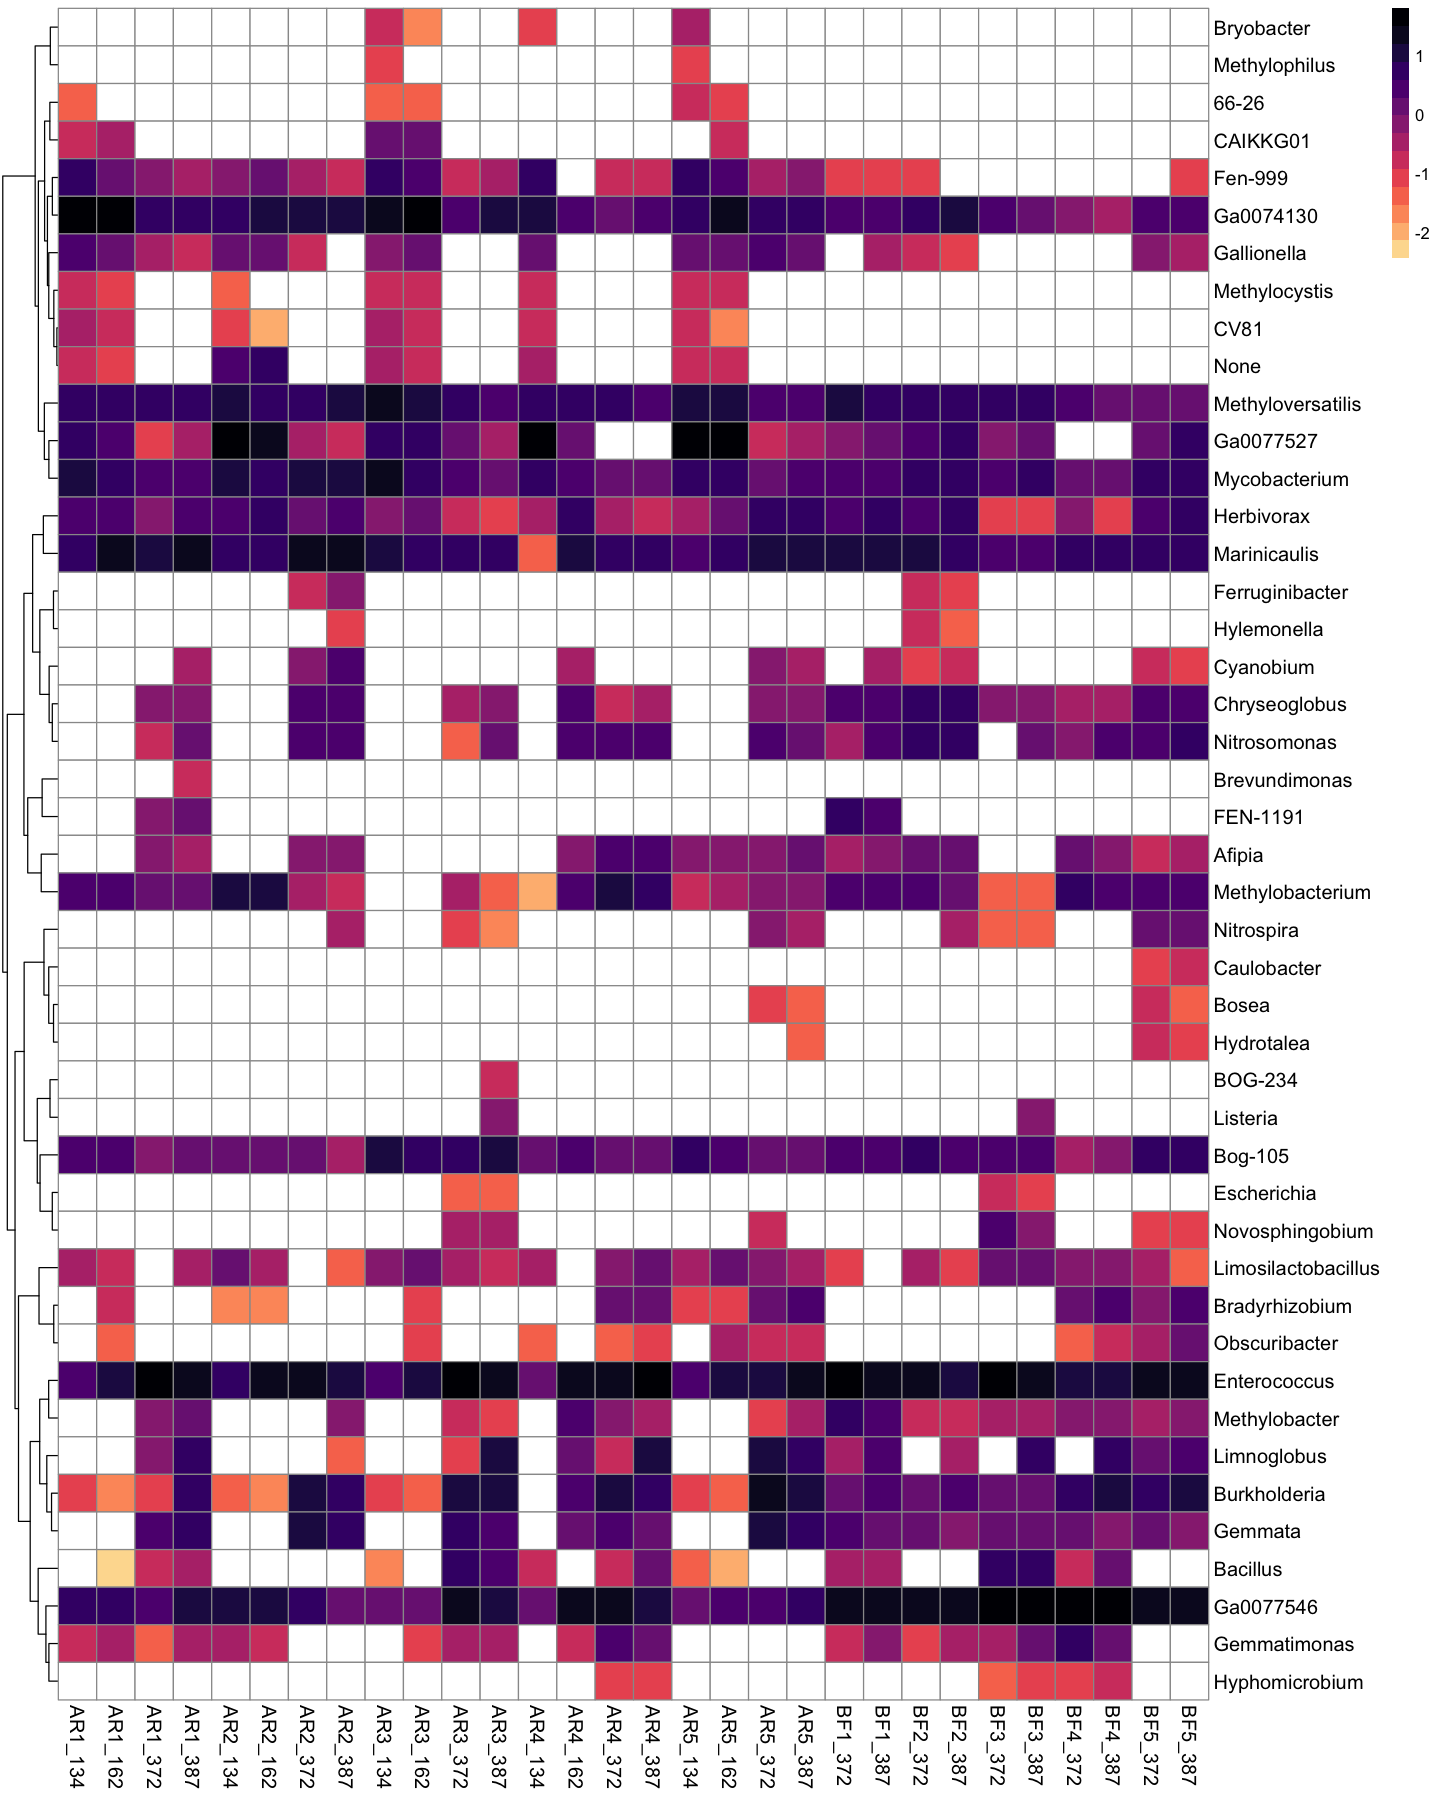

In [38]:
#Log-scale and plot heatmaps
rps2_norm_notap <- ifelse(rps2_norm_notap==0, NA, rps2_norm_notap) #make sure zeros are NAs for non-detects
rps2.logabundance <- log10(rps2_norm_notap)

options(repr.plot.width = 12, repr.plot.height = 15)

pheatmap(t(rps2.logabundance), 
         color=rev(magma(15)[1:14]), 
         #cluster_cols=sample_clust, 
         cluster_cols=FALSE,
         cluster_rows=scaff_clust,
         na_col="white",
         labels_row=as.character(genus_df$t_genus),
         #labels_col=as.character(metagenome_info$Sample_code), #to change col names
         fontsize_row=12, fontsize_col=12,
         treeheight_row=30)

#save as pdf (uncomment these lines)
        # filename="/SCIENCE/Nelson_lab/data_files_nelson/el_paso_metagenomics/rps3_analyses/rps3_heatmap.pdf", width=4.5, height=7)

## Barplots

In [39]:
#manipulate df

#merge with metadata table
genus_arbf <- merge(genus_df, arbf, by.x='sample_id', by.y='sample_id')
# genus_arbf <- subset(genus_df, select= -c(sample_id_old, ggkbase_id))
head(genus_arbf)

#remove contols
genus_nocontrols <- genus_arbf %>% filter(sample_id != "slidecontrol_387") %>% filter(sample_id != "manifcontrol_387") %>% filter(sample_id != "control_mock1e8") %>% filter(sample_id != "control_mock1e10") 
# Change level order
new_levels <- c('tapres_134', 'tapres_162', 'tapres_372', 'tapres_387', 'AR1_134', 'AR2_134','AR3_134','AR4_134','AR5_134', 'AR1_162', 'AR2_162','AR3_162','AR4_162','AR5_162',
                'AR1_372', 'AR2_372','AR3_372','AR4_372','AR5_372', 'AR1_387', 'AR2_387','AR3_387','AR4_387','AR5_387',
                'BF1_372', 'BF2_372','BF3_372','BF4_372','BF5_372', 'BF1_387', 'BF2_387','BF3_387','BF4_387','BF5_387')
genus_nocontrols$sample_id <- factor(genus_nocontrols$sample_id, levels=new_levels)
head(genus_nocontrols)

,sample_id,t_genus,percent_identity,coverage,log_cov,ARBF,type,day,sample_id_old,sample_date,⋯,ATPe_avg_RLU,bf_ATPe_avg_nmol.cm2,bf_ATPi_avg_nmol.cm2,ATPe_avg_nM,ATPi_avg_nM,flow_rate_mL.min,residence_time_h,length.cm,8/27/2019,9/30/2019
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1,AR1_134,Listeria,300.0,0.000000,-Inf,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA
2,AR1_134,Hyphomicrobium,3432.9,3.239628,0.5104952,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA
3,AR1_134,Limnoglobus,93.6,0.000000,-Inf,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA
4,AR1_134,Limosilactobacillus,200.0,0.000000,-Inf,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA
5,AR1_134,Methylocystis,292.0,0.000000,-Inf,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA
6,AR1_134,Marinicaulis,91.3,0.000000,-Inf,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA


,sample_id,t_genus,percent_identity,coverage,log_cov,ARBF,type,day,sample_id_old,sample_date,⋯,ATPe_avg_RLU,bf_ATPe_avg_nmol.cm2,bf_ATPi_avg_nmol.cm2,ATPe_avg_nM,ATPi_avg_nM,flow_rate_mL.min,residence_time_h,length.cm,8/27/2019,9/30/2019
,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dttm>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1,AR1_134,Listeria,300.0,0.000000,-Inf,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA
2,AR1_134,Hyphomicrobium,3432.9,3.239628,0.5104952,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA
3,AR1_134,Limnoglobus,93.6,0.000000,-Inf,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA
4,AR1_134,Limosilactobacillus,200.0,0.000000,-Inf,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA
5,AR1_134,Methylocystis,292.0,0.000000,-Inf,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA
6,AR1_134,Marinicaulis,91.3,0.000000,-Inf,AR,AR,134,AR_1_23,2020-02-11,⋯,6402.333,NA,NA,0.001098028,0.0003232049,1.86,NA,NA,NA,NA


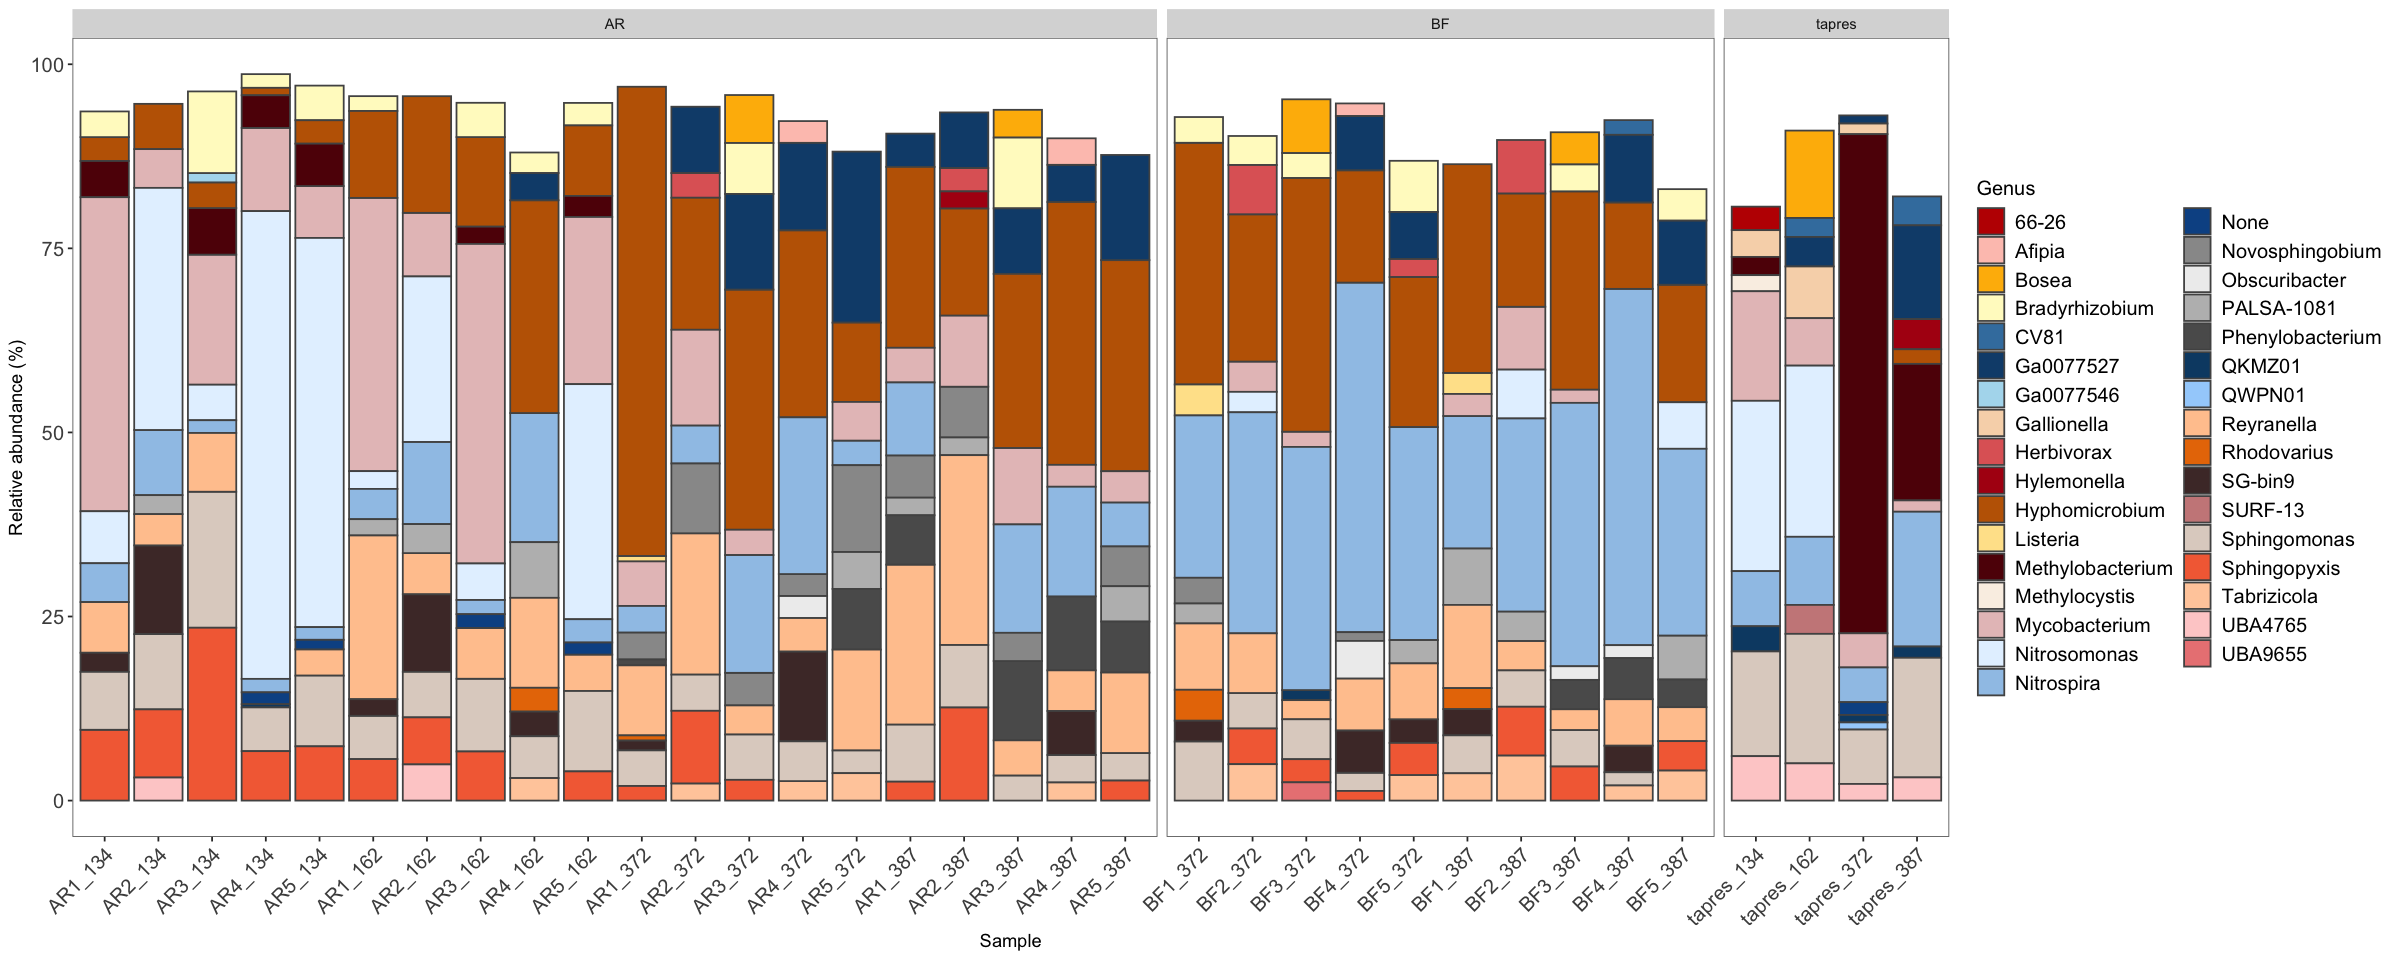

In [40]:
# Plot by GENUS

options(repr.plot.width = 20, repr.plot.height = 8)

# Only 10 most abundant per location 
abu_data <- genus_nocontrols %>%
  group_by(sample_id) %>%
  top_n(coverage,n=10)

barplot_genus <- ggplot(abu_data, aes(fill = t_genus,x=sample_id,y=coverage)) +
geom_bar(stat = "identity",color = "#525252")+
  scale_fill_manual(values = colors3, na.value = na.color) + 
  theme(panel.background=element_blank(), panel.border = element_rect(color = "#6c6c6c", fill = NA),
        axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=12),
        axis.text.y = element_text(size = 12),
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 12))+
    facet_grid(cols= vars(type), scale="free_x", space="free_x")+
#    facet_grid(.~type, scale = "free_x", space = "free_x",
#               labeller = labeller(x = tbl$id_short))+
   ylab("Relative abundance (%)") +
   xlab("Sample")+ 
   guides(fill=guide_legend(ncol=2,title = 'Genus'))


# barplot_genus <- papertheme(barplot_fam)+
#     theme(text = element_text(size = 14),
#         axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1, size=12),
#         axis.text.y = element_text(size=14),
#         legend.text=element_text(size=14),
#         legend.title=element_text(size=14),
#         strip.text.x=element_text(size = 14),
#         axis.title.x = element_text(size =14),
#         axis.title.y = element_text(size=14))

barplot_genus

In [41]:
# Export
ggsave("/Users/hannahgreenwald/Documents/Documents/Berkeley_Research/AR_metagenomics/figures/SCG_genus_barplot.png",barplot_genus, 
       device="png", dpi = dpi, width=10, height=7)


## PERMANOVA analysis 

In [47]:
arbf_nocontrols <- arbf %>% filter(replicate != "B") %>% filter(replicate != "C") %>% filter(sample_id != "slidecontrol_387") %>% filter(sample_id != "manifcontrol_387") %>% filter(sample_id != "control_mock1e8") %>% filter(sample_id != "control_mock1e10") 
arbf2 <- subset(arbf_nocontrols, select= c(sample_id, ARBF, type, day, phase, AR, sampling_event)) %>% subset(sample_id %in% ids)
arbf2$phase <- unlist(arbf2$phase)
rownames <- arbf2$sample_id
arbf2 <- subset(arbf2, select= -c(sample_id))
row.names(arbf2) <- rownames
# arbf2


rps2_norm_nocontrols

Warning message:
“Setting row names on a tibble is deprecated.”


,66-26,Afipia,BOG-234,Bog-105,Bosea,Bradyrhizobium,Brevundimonas,Bryobacter,CAIKKG01,CV81,⋯,Sulfuricella,Tabrizicola,Thiothrix,UBA3015,UBA4658,UBA4765,UBA9655,UTPRO1,UTPRO2,Undibacterium
AR1_134,0.05461084,NA,NA,NA,NA,3.4885289,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,0.15918253,NA,NA,NA,NA
AR1_162,NA,NA,NA,NA,0.003716431,2.0135218,NA,NA,NA,0.16098199,⋯,NA,NA,NA,NA,NA,0.06869102,NA,0.05505177,NA,NA
AR1_372,NA,0.5120685,NA,NA,0.169286237,0.5331088,NA,NA,NA,NA,⋯,NA,0.18697115,NA,NA,NA,NA,NA,NA,NA,NA
AR1_387,NA,0.4736276,NA,NA,0.382838292,1.3927552,NA,NA,NA,NA,⋯,NA,1.91724569,NA,NA,NA,NA,NA,NA,NA,NA
AR2_134,NA,NA,NA,NA,NA,1.8742379,NA,NA,NA,0.02289048,⋯,NA,NA,NA,NA,NA,3.13002831,NA,NA,NA,NA
AR2_162,NA,NA,NA,NA,NA,1.1698385,NA,NA,NA,0.02862476,⋯,NA,NA,NA,NA,NA,4.91130070,NA,NA,NA,NA
AR2_372,NA,0.5239759,NA,NA,NA,1.2094840,NA,NA,NA,NA,⋯,NA,2.33519721,NA,NA,NA,NA,NA,NA,NA,NA
AR2_387,NA,0.6095021,NA,NA,NA,0.3417597,NA,NA,NA,NA,⋯,NA,2.03057637,NA,NA,0.28832068,NA,NA,NA,NA,NA
AR3_134,0.04793111,NA,NA,NA,0.028081634,11.0848051,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,0.33175096,NA,NA,NA,NA
AR3_162,0.05279919,NA,NA,NA,NA,4.6571770,NA,NA,NA,0.11104545,⋯,NA,NA,NA,NA,NA,0.17912708,NA,0.06057643,NA,NA


In [48]:
# PERMANOVA

stag.dist <- vegdist(rps2_norm_nocontrols, method="bray", na.rm= TRUE)

# default test by terms

stag.div <- adonis2(stag.dist ~ type+day+phase+AR, data = arbf2, permutations = 999, method="bray")

stag.div

,Df,SumOfSqs,R2,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
type,2,0.09633313,0.02044944,0.3410696,0.992
day,1,0.54173924,0.11499954,3.8360797,0.012
phase,1,0.19349849,0.04107555,1.3701714,0.227
AR,8,0.91355969,0.19392899,0.8086196,0.779
Residual,21,2.96566420,0.62954647,NA,NA
Total,33,4.71079475,1.00000000,NA,NA
